In [1]:
import numpy as np
import pickle
from collections import defaultdict
from glob import glob
import gzip
import json
import matplotlib.pyplot as plt
from itertools import combinations, permutations, product
%matplotlib inline


In [2]:
from heroes import Hero


In [3]:
# import the JSON and save the feature vectors as pickled numpy arrays
# Feature vectors start with heroes, where -1 indicates dire pick, and 1. hero values are followed by
# average mmr, and lobby type
# TODO: deduplicate the matches

match_count = defaultdict(int)
win_count = defaultdict(int)

radiant_wins = defaultdict(int)
radiant_matches = defaultdict(int)

dire_wins = defaultdict(int)
dire_matches = defaultdict(int)

def match_from_json(match):
    radiant_team = []
    dire_team = []
    for player in match['players']:
        hero = Hero.by_id(player['hero_id'])
        match_count[hero] += 1        
        if player['isRadiant']:
            radiant_team.append(hero)
            radiant_matches[hero] += 1        
            if match['radiant_win']:
                radiant_wins[hero] += 1
        else:
            dire_team.append(hero)
            dire_matches[hero] += 1
            if not match['radiant_win']:
                dire_wins[hero] += 1
            
        if bool(player['isRadiant']) == bool(match['radiant_win']):
            win_count[hero] += 1
            
    return Hero.vector_from_teams(radiant_team, dire_team), match['radiant_win']

def match_from_steam(match):
    radiant_team = []
    dire_team = []
    for player in match['players']:
        hero = Hero.by_id(player['hero_id'])
        isRadiant = player['player_slot'] < 127
        if isRadiant:
            radiant_team.append(hero)
        else:
            dire_team.append(hero)
                
        match_count[hero] += 1
        if bool(isRadiant) == bool(match['radiant_win']):
            win_count[hero] += 1
            
    return Hero.vector_from_teams(radiant_team, dire_team), match['radiant_win']

match_ids = set()

def load_steam():
    X = []
    Y = []
    for file in glob("crawled_matches_steam/*.txt.gz"):
        with gzip.open(file, 'rb') as f:
            print("loading file {}".format(file))
            file_content = f.read().decode("utf-8")
            for line in file_content.split("\n"):
                #if i % 1000 == 0: print(i)
                
                try:
                    #print(line)
                    match = json.loads(line)
                    if match['lobby_type'] == 7 and match['match_id'] not in match_ids:
                        x, y = match_from_steam(match)
                        X.append(x)
                        Y.append(y)
                        match_ids.add(match['match_id'])
                except Exception as e:
                    pass # ignore the final empty line
    return np.array(X), np.array(Y).T
    
def get_input_data():
    X = []
    Y = []
    for file in glob("crawled_matches/*.txt.gz"):
        with gzip.open(file, 'rb') as f:
            print("loading file {}".format(file))
            file_content = f.read().decode("utf-8")
            for line in file_content.split("\n"):
                match = json.loads(line)
                if match['lobby_type'] == 7 and match['match_id'] not in match_ids:
                    x, y = match_from_json(match)
                    X.append(x)
                    Y.append(y)
                    match_ids.add(match['match_id'])

        
    #data = json.load(open('sample.json'))
    #X = np.array(list(map(match_from_json, data)))
    #Y = np.array([list(map(lambda m: 1 if m['radiant_win'] else 0, data))]).T
    return np.array(X), np.array(Y).T

#load_steam()
with open('training_data', 'wb') as f:
    X, Y = get_input_data()
    np.savez(f, x=X, y=Y)


loading file crawled_matches\1516382675.txt.gz
loading file crawled_matches\1516382731.txt.gz
loading file crawled_matches\1516382786.txt.gz
loading file crawled_matches\1516382840.txt.gz
loading file crawled_matches\1516382894.txt.gz
loading file crawled_matches\1516382951.txt.gz
loading file crawled_matches\1516383006.txt.gz
loading file crawled_matches\1516383060.txt.gz
loading file crawled_matches\1516383116.txt.gz
loading file crawled_matches\1516383171.txt.gz
loading file crawled_matches\1516383229.txt.gz
loading file crawled_matches\1516383286.txt.gz
loading file crawled_matches\1516383352.txt.gz
loading file crawled_matches\1516383406.txt.gz
loading file crawled_matches\1516383467.txt.gz
loading file crawled_matches\1516383532.txt.gz
loading file crawled_matches\1516383590.txt.gz
loading file crawled_matches\1516383648.txt.gz
loading file crawled_matches\1516383702.txt.gz
loading file crawled_matches\1516383759.txt.gz
loading file crawled_matches\1516383813.txt.gz
loading file 

loading file crawled_matches\1516393602.txt.gz
loading file crawled_matches\1516393654.txt.gz
loading file crawled_matches\1516393706.txt.gz
loading file crawled_matches\1516393761.txt.gz
loading file crawled_matches\1516393811.txt.gz
loading file crawled_matches\1516393861.txt.gz
loading file crawled_matches\1516393912.txt.gz
loading file crawled_matches\1516393965.txt.gz
loading file crawled_matches\1516394014.txt.gz
loading file crawled_matches\1516394066.txt.gz
loading file crawled_matches\1516394117.txt.gz
loading file crawled_matches\1516394169.txt.gz
loading file crawled_matches\1516394220.txt.gz
loading file crawled_matches\1516394270.txt.gz
loading file crawled_matches\1516394320.txt.gz
loading file crawled_matches\1516394370.txt.gz
loading file crawled_matches\1516394421.txt.gz
loading file crawled_matches\1516394474.txt.gz
loading file crawled_matches\1516394524.txt.gz
loading file crawled_matches\1516394576.txt.gz
loading file crawled_matches\1516394633.txt.gz
loading file 

loading file crawled_matches\1516415036.txt.gz
loading file crawled_matches\1516415238.txt.gz
loading file crawled_matches\1516415429.txt.gz
loading file crawled_matches\1516415616.txt.gz
loading file crawled_matches\1516415816.txt.gz
loading file crawled_matches\1516416032.txt.gz
loading file crawled_matches\1516416259.txt.gz
loading file crawled_matches\1516416492.txt.gz
loading file crawled_matches\1516416693.txt.gz
loading file crawled_matches\1516416888.txt.gz
loading file crawled_matches\1516417093.txt.gz
loading file crawled_matches\1516417290.txt.gz
loading file crawled_matches\1516417515.txt.gz
loading file crawled_matches\1516417746.txt.gz
loading file crawled_matches\1516417940.txt.gz
loading file crawled_matches\1516418154.txt.gz
loading file crawled_matches\1516418366.txt.gz
loading file crawled_matches\1516418588.txt.gz
loading file crawled_matches\1516418799.txt.gz
loading file crawled_matches\1516419030.txt.gz
loading file crawled_matches\1516419264.txt.gz
loading file 

loading file crawled_matches\1516473639.txt.gz
loading file crawled_matches\1516473916.txt.gz
loading file crawled_matches\1516474243.txt.gz
loading file crawled_matches\1516474539.txt.gz
loading file crawled_matches\1516474938.txt.gz
loading file crawled_matches\1516475318.txt.gz
loading file crawled_matches\1516475604.txt.gz
loading file crawled_matches\1516475922.txt.gz
loading file crawled_matches\1516476275.txt.gz
loading file crawled_matches\1516476586.txt.gz
loading file crawled_matches\1516476968.txt.gz
loading file crawled_matches\1516477293.txt.gz
loading file crawled_matches\1516477646.txt.gz
loading file crawled_matches\1516477955.txt.gz
loading file crawled_matches\1516478277.txt.gz
loading file crawled_matches\1516478590.txt.gz
loading file crawled_matches\1516478953.txt.gz
loading file crawled_matches\1516479279.txt.gz
loading file crawled_matches\1516479738.txt.gz
loading file crawled_matches\1516480198.txt.gz
loading file crawled_matches\1516480905.txt.gz
loading file 

loading file crawled_matches\1516545194.txt.gz
loading file crawled_matches\1516545655.txt.gz
loading file crawled_matches\1516546099.txt.gz
loading file crawled_matches\1516546564.txt.gz
loading file crawled_matches\1516546997.txt.gz
loading file crawled_matches\1516547388.txt.gz
loading file crawled_matches\1516547819.txt.gz
loading file crawled_matches\1516548265.txt.gz
loading file crawled_matches\1516548730.txt.gz
loading file crawled_matches\1516549138.txt.gz
loading file crawled_matches\1516549677.txt.gz
loading file crawled_matches\1516550064.txt.gz
loading file crawled_matches\1516550481.txt.gz
loading file crawled_matches\1516550927.txt.gz
loading file crawled_matches\1516551324.txt.gz
loading file crawled_matches\1516551777.txt.gz
loading file crawled_matches\1516552224.txt.gz
loading file crawled_matches\1516552726.txt.gz
loading file crawled_matches\1516553325.txt.gz
loading file crawled_matches\1516553817.txt.gz
loading file crawled_matches\1516554250.txt.gz
loading file 

loading file crawled_matches\1516659926.txt.gz
loading file crawled_matches\1516660212.txt.gz
loading file crawled_matches\1516660464.txt.gz
loading file crawled_matches\1516660737.txt.gz
loading file crawled_matches\1516661006.txt.gz
loading file crawled_matches\1516661287.txt.gz
loading file crawled_matches\1516661561.txt.gz
loading file crawled_matches\1516661829.txt.gz
loading file crawled_matches\1516662095.txt.gz
loading file crawled_matches\1516662350.txt.gz
loading file crawled_matches\1516662621.txt.gz
loading file crawled_matches\1516662884.txt.gz
loading file crawled_matches\1516663210.txt.gz
loading file crawled_matches\1516663502.txt.gz
loading file crawled_matches\1516663760.txt.gz
loading file crawled_matches\1516664006.txt.gz
loading file crawled_matches\1516664307.txt.gz
loading file crawled_matches\1516664577.txt.gz
loading file crawled_matches\1516664828.txt.gz
loading file crawled_matches\1516665152.txt.gz
loading file crawled_matches\1516665436.txt.gz
loading file 

loading file crawled_matches\1516710645.txt.gz
loading file crawled_matches\1516710903.txt.gz
loading file crawled_matches\1516711196.txt.gz
loading file crawled_matches\1516711519.txt.gz
loading file crawled_matches\1516711824.txt.gz
loading file crawled_matches\1516712161.txt.gz
loading file crawled_matches\1516712456.txt.gz
loading file crawled_matches\1516712704.txt.gz
loading file crawled_matches\1516712964.txt.gz
loading file crawled_matches\1516713231.txt.gz
loading file crawled_matches\1516713589.txt.gz
loading file crawled_matches\1516713920.txt.gz
loading file crawled_matches\1516714205.txt.gz
loading file crawled_matches\1516714456.txt.gz
loading file crawled_matches\1516714707.txt.gz
loading file crawled_matches\1516714948.txt.gz
loading file crawled_matches\1516715284.txt.gz
loading file crawled_matches\1516715584.txt.gz
loading file crawled_matches\1516715899.txt.gz
loading file crawled_matches\1516716188.txt.gz
loading file crawled_matches\1516716462.txt.gz
loading file 

loading file crawled_matches\1516764172.txt.gz
loading file crawled_matches\1516764463.txt.gz
loading file crawled_matches\1516764754.txt.gz
loading file crawled_matches\1516765131.txt.gz
loading file crawled_matches\1516765434.txt.gz
loading file crawled_matches\1516765687.txt.gz
loading file crawled_matches\1516765965.txt.gz
loading file crawled_matches\1516766272.txt.gz
loading file crawled_matches\1516766589.txt.gz
loading file crawled_matches\1516766870.txt.gz
loading file crawled_matches\1516767143.txt.gz
loading file crawled_matches\1516767473.txt.gz
loading file crawled_matches\1516767858.txt.gz
loading file crawled_matches\1516768122.txt.gz
loading file crawled_matches\1516768415.txt.gz
loading file crawled_matches\1516768703.txt.gz
loading file crawled_matches\1516768964.txt.gz
loading file crawled_matches\1516769224.txt.gz
loading file crawled_matches\1516769547.txt.gz
loading file crawled_matches\1516769859.txt.gz
loading file crawled_matches\1516770128.txt.gz
loading file 

loading file crawled_matches\1518068922.txt.gz
loading file crawled_matches\1518069222.txt.gz
loading file crawled_matches\1518069475.txt.gz
loading file crawled_matches\1518069873.txt.gz
loading file crawled_matches\1518070127.txt.gz
loading file crawled_matches\1518070432.txt.gz
loading file crawled_matches\1518070762.txt.gz
loading file crawled_matches\1518071360.txt.gz
loading file crawled_matches\1518071668.txt.gz
loading file crawled_matches\1518071985.txt.gz
loading file crawled_matches\1518072356.txt.gz
loading file crawled_matches\1518072671.txt.gz
loading file crawled_matches\1518073095.txt.gz
loading file crawled_matches\1518073475.txt.gz
loading file crawled_matches\1518073770.txt.gz
loading file crawled_matches\1518074115.txt.gz
loading file crawled_matches\1518074405.txt.gz
loading file crawled_matches\1518074702.txt.gz
loading file crawled_matches\1518075074.txt.gz
loading file crawled_matches\1518075383.txt.gz
loading file crawled_matches\1518075704.txt.gz
loading file 

In [4]:
with open('training_data_steam', 'wb') as f:
    X, Y = load_steam()
    np.savez(f, x=X, y=Y)

loading file crawled_matches_steam\3155571982.txt.gz
loading file crawled_matches_steam\3155606301.txt.gz
loading file crawled_matches_steam\3155641078.txt.gz
loading file crawled_matches_steam\3155675376.txt.gz
loading file crawled_matches_steam\3155709868.txt.gz
loading file crawled_matches_steam\3155744377.txt.gz
loading file crawled_matches_steam\3155778426.txt.gz
loading file crawled_matches_steam\3155812367.txt.gz
loading file crawled_matches_steam\3155846216.txt.gz
loading file crawled_matches_steam\3155879530.txt.gz
loading file crawled_matches_steam\3155913168.txt.gz
loading file crawled_matches_steam\3155946314.txt.gz
loading file crawled_matches_steam\3155979319.txt.gz
loading file crawled_matches_steam\3156010895.txt.gz
loading file crawled_matches_steam\3156042802.txt.gz
loading file crawled_matches_steam\3156074462.txt.gz
loading file crawled_matches_steam\3156105771.txt.gz
loading file crawled_matches_steam\3156136481.txt.gz
loading file crawled_matches_steam\3156166368.

loading file crawled_matches_steam\3160560260.txt.gz
loading file crawled_matches_steam\3160593856.txt.gz
loading file crawled_matches_steam\3160628182.txt.gz
loading file crawled_matches_steam\3160662257.txt.gz
loading file crawled_matches_steam\3160696693.txt.gz
loading file crawled_matches_steam\3160731006.txt.gz
loading file crawled_matches_steam\3160765529.txt.gz
loading file crawled_matches_steam\3160799618.txt.gz
loading file crawled_matches_steam\3160833335.txt.gz
loading file crawled_matches_steam\3160867330.txt.gz
loading file crawled_matches_steam\3160901286.txt.gz
loading file crawled_matches_steam\3160934820.txt.gz
loading file crawled_matches_steam\3160967765.txt.gz
loading file crawled_matches_steam\3161000514.txt.gz
loading file crawled_matches_steam\3161033420.txt.gz
loading file crawled_matches_steam\3161065905.txt.gz
loading file crawled_matches_steam\3161097490.txt.gz
loading file crawled_matches_steam\3161128742.txt.gz
loading file crawled_matches_steam\3161159830.

loading file crawled_matches_steam\3165584500.txt.gz
loading file crawled_matches_steam\3165617022.txt.gz
loading file crawled_matches_steam\3165649989.txt.gz
loading file crawled_matches_steam\3165682426.txt.gz
loading file crawled_matches_steam\3165715862.txt.gz
loading file crawled_matches_steam\3165749214.txt.gz
loading file crawled_matches_steam\3165782898.txt.gz
loading file crawled_matches_steam\3165816717.txt.gz
loading file crawled_matches_steam\3165850137.txt.gz
loading file crawled_matches_steam\3165882823.txt.gz
loading file crawled_matches_steam\3165916163.txt.gz
loading file crawled_matches_steam\3165949094.txt.gz
loading file crawled_matches_steam\3165981508.txt.gz
loading file crawled_matches_steam\3166014390.txt.gz
loading file crawled_matches_steam\3166046507.txt.gz
loading file crawled_matches_steam\3166079242.txt.gz
loading file crawled_matches_steam\3166110817.txt.gz
loading file crawled_matches_steam\3166142335.txt.gz
loading file crawled_matches_steam\3166172939.

loading file crawled_matches_steam\3170446535.txt.gz
loading file crawled_matches_steam\3170480070.txt.gz
loading file crawled_matches_steam\3170513661.txt.gz
loading file crawled_matches_steam\3170547295.txt.gz
loading file crawled_matches_steam\3170581155.txt.gz
loading file crawled_matches_steam\3170615383.txt.gz
loading file crawled_matches_steam\3170649597.txt.gz
loading file crawled_matches_steam\3170683761.txt.gz
loading file crawled_matches_steam\3170718374.txt.gz
loading file crawled_matches_steam\3170753179.txt.gz
loading file crawled_matches_steam\3170787564.txt.gz
loading file crawled_matches_steam\3170821315.txt.gz
loading file crawled_matches_steam\3170855736.txt.gz
loading file crawled_matches_steam\3170889816.txt.gz
loading file crawled_matches_steam\3170922811.txt.gz
loading file crawled_matches_steam\3170955900.txt.gz
loading file crawled_matches_steam\3170989736.txt.gz
loading file crawled_matches_steam\3171023446.txt.gz
loading file crawled_matches_steam\3171055897.

loading file crawled_matches_steam\3175699561.txt.gz
loading file crawled_matches_steam\3175732562.txt.gz
loading file crawled_matches_steam\3175765391.txt.gz
loading file crawled_matches_steam\3175798416.txt.gz
loading file crawled_matches_steam\3175830843.txt.gz
loading file crawled_matches_steam\3175863431.txt.gz
loading file crawled_matches_steam\3175895578.txt.gz
loading file crawled_matches_steam\3175927098.txt.gz
loading file crawled_matches_steam\3175958835.txt.gz
loading file crawled_matches_steam\3175989936.txt.gz
loading file crawled_matches_steam\3176020651.txt.gz
loading file crawled_matches_steam\3176051231.txt.gz
loading file crawled_matches_steam\3176081725.txt.gz
loading file crawled_matches_steam\3176111824.txt.gz
loading file crawled_matches_steam\3176141856.txt.gz
loading file crawled_matches_steam\3176171770.txt.gz
loading file crawled_matches_steam\3176201405.txt.gz
loading file crawled_matches_steam\3176231253.txt.gz
loading file crawled_matches_steam\3176260531.

loading file crawled_matches_steam\3180417028.txt.gz
loading file crawled_matches_steam\3180449037.txt.gz
loading file crawled_matches_steam\3180480750.txt.gz
loading file crawled_matches_steam\3180512327.txt.gz
loading file crawled_matches_steam\3180543305.txt.gz
loading file crawled_matches_steam\3180574457.txt.gz
loading file crawled_matches_steam\3180605534.txt.gz
loading file crawled_matches_steam\3180636583.txt.gz
loading file crawled_matches_steam\3180667427.txt.gz
loading file crawled_matches_steam\3180698003.txt.gz
loading file crawled_matches_steam\3180728799.txt.gz
loading file crawled_matches_steam\3180758787.txt.gz
loading file crawled_matches_steam\3180788433.txt.gz
loading file crawled_matches_steam\3180818748.txt.gz
loading file crawled_matches_steam\3180847626.txt.gz
loading file crawled_matches_steam\3180876690.txt.gz
loading file crawled_matches_steam\3180905434.txt.gz
loading file crawled_matches_steam\3180934261.txt.gz
loading file crawled_matches_steam\3180963019.

loading file crawled_matches_steam\3185060899.txt.gz
loading file crawled_matches_steam\3185091721.txt.gz
loading file crawled_matches_steam\3185122467.txt.gz
loading file crawled_matches_steam\3185152805.txt.gz
loading file crawled_matches_steam\3185183113.txt.gz
loading file crawled_matches_steam\3185213109.txt.gz
loading file crawled_matches_steam\3185242664.txt.gz
loading file crawled_matches_steam\3185272801.txt.gz
loading file crawled_matches_steam\3185302548.txt.gz
loading file crawled_matches_steam\3185332353.txt.gz
loading file crawled_matches_steam\3185362483.txt.gz
loading file crawled_matches_steam\3185392556.txt.gz
loading file crawled_matches_steam\3185422758.txt.gz
loading file crawled_matches_steam\3185453340.txt.gz
loading file crawled_matches_steam\3185483802.txt.gz
loading file crawled_matches_steam\3185514623.txt.gz
loading file crawled_matches_steam\3185545933.txt.gz
loading file crawled_matches_steam\3185577082.txt.gz
loading file crawled_matches_steam\3185607870.

loading file crawled_matches_steam\3189560169.txt.gz
loading file crawled_matches_steam\3189587561.txt.gz
loading file crawled_matches_steam\3189615376.txt.gz
loading file crawled_matches_steam\3189643540.txt.gz
loading file crawled_matches_steam\3189671901.txt.gz
loading file crawled_matches_steam\3189700361.txt.gz
loading file crawled_matches_steam\3189729903.txt.gz
loading file crawled_matches_steam\3189758839.txt.gz
loading file crawled_matches_steam\3189787775.txt.gz
loading file crawled_matches_steam\3189816372.txt.gz
loading file crawled_matches_steam\3189844603.txt.gz
loading file crawled_matches_steam\3189873168.txt.gz
loading file crawled_matches_steam\3189902044.txt.gz
loading file crawled_matches_steam\3189931277.txt.gz
loading file crawled_matches_steam\3189961334.txt.gz
loading file crawled_matches_steam\3189991430.txt.gz
loading file crawled_matches_steam\3190021945.txt.gz
loading file crawled_matches_steam\3190052970.txt.gz
loading file crawled_matches_steam\3190084140.

loading file crawled_matches_steam\3194071982.txt.gz
loading file crawled_matches_steam\3194103740.txt.gz
loading file crawled_matches_steam\3194135128.txt.gz
loading file crawled_matches_steam\3194167427.txt.gz
loading file crawled_matches_steam\3194199446.txt.gz
loading file crawled_matches_steam\3194231349.txt.gz
loading file crawled_matches_steam\3194262614.txt.gz
loading file crawled_matches_steam\3194294273.txt.gz
loading file crawled_matches_steam\3194325085.txt.gz
loading file crawled_matches_steam\3194356128.txt.gz
loading file crawled_matches_steam\3194386841.txt.gz
loading file crawled_matches_steam\3194417638.txt.gz
loading file crawled_matches_steam\3194448822.txt.gz
loading file crawled_matches_steam\3194479563.txt.gz
loading file crawled_matches_steam\3194510615.txt.gz
loading file crawled_matches_steam\3194541634.txt.gz
loading file crawled_matches_steam\3194572664.txt.gz
loading file crawled_matches_steam\3194603545.txt.gz
loading file crawled_matches_steam\3194635289.

loading file crawled_matches_steam\3198658665.txt.gz
loading file crawled_matches_steam\3198685307.txt.gz
loading file crawled_matches_steam\3198711905.txt.gz
loading file crawled_matches_steam\3198738174.txt.gz
loading file crawled_matches_steam\3198764501.txt.gz
loading file crawled_matches_steam\3198790456.txt.gz
loading file crawled_matches_steam\3198816485.txt.gz
loading file crawled_matches_steam\3198842979.txt.gz
loading file crawled_matches_steam\3198869968.txt.gz
loading file crawled_matches_steam\3198898449.txt.gz
loading file crawled_matches_steam\3198927489.txt.gz
loading file crawled_matches_steam\3198956723.txt.gz
loading file crawled_matches_steam\3198985667.txt.gz
loading file crawled_matches_steam\3199015079.txt.gz
loading file crawled_matches_steam\3199045502.txt.gz
loading file crawled_matches_steam\3199075351.txt.gz
loading file crawled_matches_steam\3199105099.txt.gz
loading file crawled_matches_steam\3199134144.txt.gz
loading file crawled_matches_steam\3199163028.

In [5]:
hero_wins = defaultdict(int)
hero_matches = defaultdict(int)
pair_wins = defaultdict(int)
pair_matches = defaultdict(int)
opponents_wins = defaultdict(int)
opponents_matches = defaultdict(int)

with open('training_data_steam', 'rb') as f:
    i = np.load(f)
    X, y = i['x'], i['y']
    
    b = y.astype(int) - (y == 0).astype(int)
    # now d is a hero vectors where 1s are winners and -1 are losers 
    d = X * b.reshape(-1, 1)
    
    for match in d:
        winners = [Hero.by_offset(x).id for x in np.argwhere(match == 1).squeeze()]
        losers = [Hero.by_offset(x).id for x in np.argwhere(match == -1).squeeze()]

        for hero in winners:
            hero_wins[hero] += 1
            hero_matches[hero] += 1

        for hero in losers:
            hero_matches[hero] += 1

        for pair in combinations(winners, 2):
            pair_wins[pair] += 1
            pair_matches[pair] += 1

        for pair in combinations(losers, 2):
            pair_matches[pair] += 1
            
        for pair in product(winners, losers):
            opponents_wins[pair] += 1
            opponents_matches[pair] += 1
        
        for pair in product(losers, winners):
            opponents_matches[pair] += 1
        


In [7]:
print(len(pair_matches.keys()))
print(len(pair_wins.keys()))
print(len(hero_wins))
print(115*114//2)

print(len(opponents_matches))
print(115*114)

def synergy(a, b, ab):
    return ab / (a * b) ** (1/2) - 1.0

print(synergy(0.4, 0.5, 0.4))

def synergy_matrix(hero_wins, hero_matches, pair_wins, pair_matches):
    ids = sorted(hero_matches.keys())
    synergies = {}
    for a, b in combinations(ids, 2):
        win_a = hero_wins[a] / max(hero_matches[a], 1)
        win_b = hero_wins[b] / max(hero_matches[b], 1)
        win_pair = pair_wins[(a,b)] / max(pair_matches[(a,b)], 1)
        synergies[(a,b)] = {
            'synergy': synergy(win_a, win_b, win_pair), 
            'win_chance': win_pair,
            'n': pair_matches[(a,b)]
        }
    return synergies

sm = synergy_matrix(hero_wins, hero_matches, pair_wins, pair_matches)

for pair, syn in sorted(sm.items(), key=lambda v: v[1]['win_chance']):
    heroA = Hero.by_id(pair[0])
    heroB = Hero.by_id(pair[1])
    print("{}, {} -> {:.3f} wc: {:.3f} matches {}".format(heroA, heroB, syn['synergy'], syn['win_chance'], pair_matches[pair]))


6555
6555
115
6555
13110
13110
-0.10557280900008403
Io, Oracle -> -0.352 wc: 0.263 matches 598
Alchemist, Lone Druid -> -0.322 wc: 0.264 matches 3780
Lone Druid, Io -> -0.283 wc: 0.271 matches 872
Nature's Prophet, Lone Druid -> -0.269 wc: 0.286 matches 4839
Lone Druid, Naga Siren -> -0.282 wc: 0.293 matches 823
Alchemist, Io -> -0.241 wc: 0.297 matches 5466
Nature's Prophet, Io -> -0.244 wc: 0.297 matches 2942
Lone Druid, Magnus -> -0.268 wc: 0.299 matches 3576
Broodmother, Lone Druid -> -0.244 wc: 0.301 matches 1890
Lone Druid, Timbersaw -> -0.250 wc: 0.306 matches 4039
Lina, Lone Druid -> -0.233 wc: 0.308 matches 4794
Tiny, Lone Druid -> -0.233 wc: 0.309 matches 3906
Pugna, Io -> -0.248 wc: 0.309 matches 1206
Keeper of the Light, Io -> -0.260 wc: 0.310 matches 1373
Templar Assassin, Io -> -0.229 wc: 0.312 matches 2536
Morphling, Lone Druid -> -0.222 wc: 0.312 matches 3322
Pugna, Lone Druid -> -0.236 wc: 0.313 matches 2505
Puck, Lone Druid -> -0.218 wc: 0.313 matches 4353
Nature's Pr

Anti-Mage, Gyrocopter -> -0.016 wc: 0.468 matches 32826
Viper, Rubick -> -0.029 wc: 0.468 matches 60534
Vengeful Spirit, Nature's Prophet -> -0.014 wc: 0.468 matches 22463
Sand King, Venomancer -> -0.043 wc: 0.468 matches 28065
Enchantress, Winter Wyvern -> -0.012 wc: 0.468 matches 6205
Tiny, Ogre Magi -> -0.014 wc: 0.469 matches 39037
Dragon Knight, Arc Warden -> -0.043 wc: 0.469 matches 7780
Riki, Lifestealer -> -0.019 wc: 0.469 matches 39134
Slark, Dark Willow -> -0.032 wc: 0.469 matches 50460
Drow Ranger, Batrider -> -0.009 wc: 0.469 matches 10868
Broodmother, Chaos Knight -> -0.027 wc: 0.469 matches 12159
Queen of Pain, Disruptor -> -0.026 wc: 0.469 matches 44108
Templar Assassin, Omniknight -> -0.026 wc: 0.469 matches 18335
Slardar, Gyrocopter -> -0.029 wc: 0.469 matches 25809
Dark Willow, Pangolier -> -0.033 wc: 0.469 matches 48086
Kunkka, Disruptor -> -0.047 wc: 0.469 matches 59361
Batrider, Ogre Magi -> -0.022 wc: 0.469 matches 13019
Morphling, Abaddon -> -0.026 wc: 0.469 matc

Slark, Centaur Warrunner -> 0.026 wc: 0.515 matches 35790
Axe, Weaver -> 0.018 wc: 0.515 matches 93450
Razor, Spirit Breaker -> 0.019 wc: 0.515 matches 38569
Wraith King, Pugna -> 0.033 wc: 0.515 matches 24163
Gyrocopter, Centaur Warrunner -> 0.016 wc: 0.515 matches 14360
Axe, Storm Spirit -> 0.006 wc: 0.515 matches 131383
Treant Protector, Disruptor -> 0.022 wc: 0.515 matches 7430
Weaver, Ursa -> 0.016 wc: 0.515 matches 32151
Slardar, Outworld Devourer -> 0.016 wc: 0.515 matches 58315
Pudge, Weaver -> 0.009 wc: 0.515 matches 288019
Ogre Magi, Phoenix -> 0.017 wc: 0.515 matches 19770
Medusa, Abaddon -> 0.006 wc: 0.515 matches 24314
Terrorblade, Phoenix -> 0.022 wc: 0.515 matches 8991
Bloodseeker, Sven -> 0.018 wc: 0.515 matches 103282
Riki, Enigma -> 0.024 wc: 0.515 matches 21364
Viper, Undying -> 0.025 wc: 0.516 matches 18465
Medusa, Elder Titan -> 0.009 wc: 0.516 matches 22005
Clinkz, Silencer -> 0.013 wc: 0.516 matches 34875
Tinker, Doom -> 0.015 wc: 0.516 matches 72890
Luna, Invoke

In [8]:
pickle.dump( sm, open( "data/synergy.p", "wb" ) )

{'synergy': 0.006725958469396387, 'win_chance': 0.5040924988254946, 'n': 191570}
Anti-Mage 0.47764000732390394 0.5040924988254946
{'synergy': 0.02745177987369929, 'win_chance': 0.5415598539578964, 'n': 77238}
Axe 0.5292645277987053 0.5415598539578964
{'synergy': 0.002817647674827395, 'win_chance': 0.5035930408472012, 'n': 31728}
Bane 0.48041688644605945 0.5035930408472012
{'synergy': 0.05569442609998787, 'win_chance': 0.5401100468718157, 'n': 122675}
Bloodseeker 0.4986442497687115 0.5401100468718157
{'synergy': 0.09788512927421622, 'win_chance': 0.5846873962984741, 'n': 171767}
Crystal Maiden 0.5403018064330581 0.5846873962984741
{'synergy': 0.019284060037549455, 'win_chance': 0.5269993900470022, 'n': 111484}
Drow Ranger 0.5092517387201622 0.5269993900470022
{'synergy': 0.00967480875509974, 'win_chance': 0.5085449405292515, 'n': 117789}
Earthshaker 0.4832795237648037 0.5085449405292515
{'synergy': 0.04563310438297363, 'win_chance': 0.5515164896057906, 'n': 230994}
Juggernaut 0.52998199

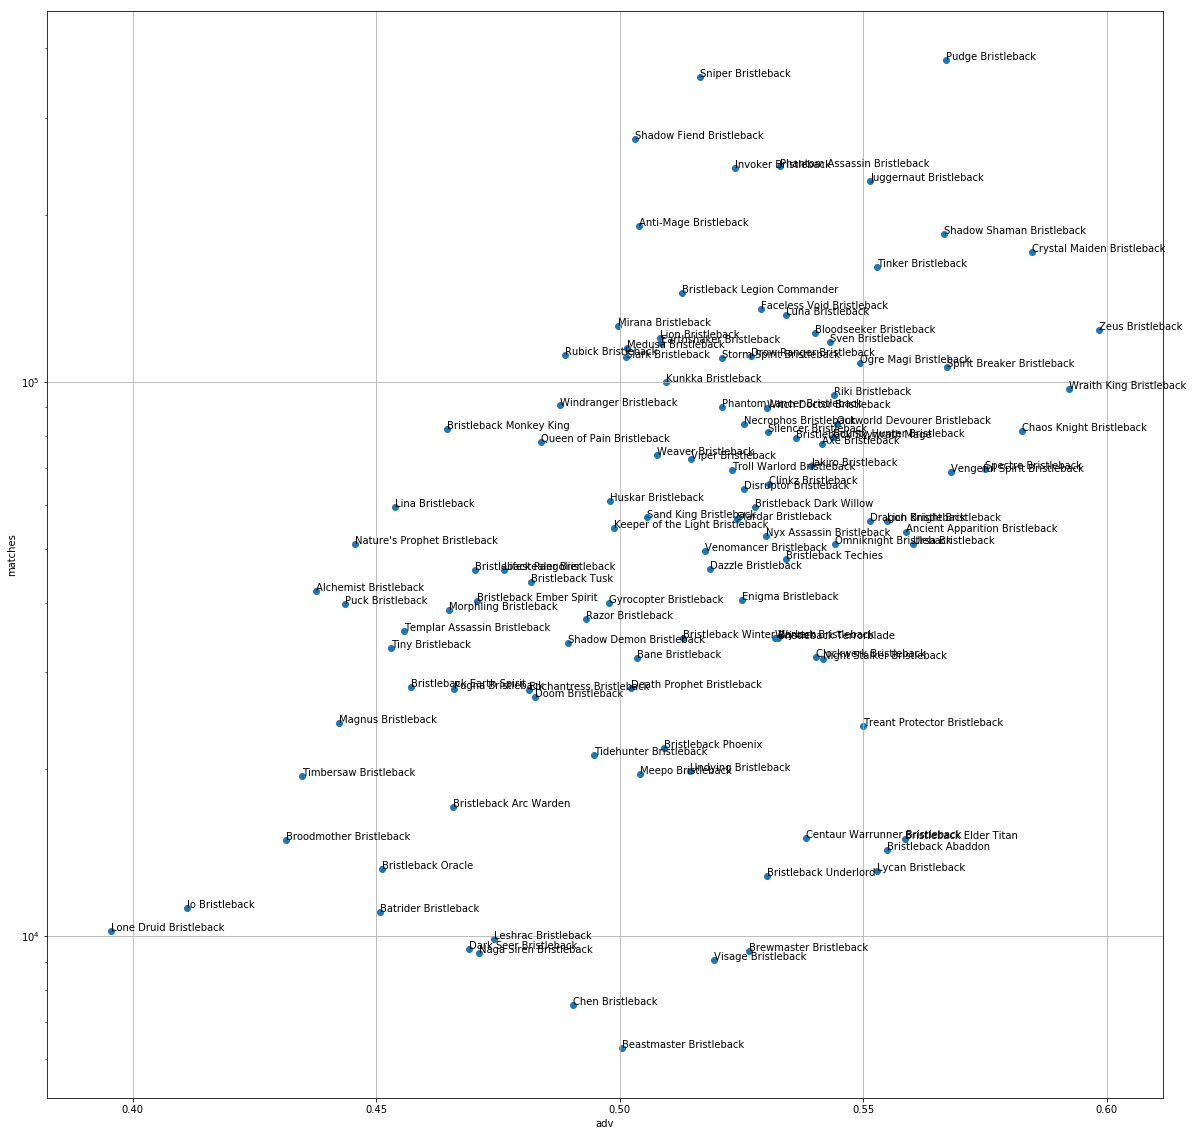

In [30]:

#res = []
#for i in range(len(heroes)):
#    res.append((name_for_offset(i), win_count[offset_to_id[i]], match_count[offset_to_id[i]], float(win_count[offset_to_id[i]]) /match_count[offset_to_id[i]]))

hh = 99
    
#i = list(filter(lambda x: x[1]['n']>20000 and x[1]['synergy'] > 0.01 , am.items()))
i = list(filter(lambda x: x[0][0] == hh or x[0][1] == hh, sm.items()))
#print(len(i))
#i = sm.items()
z = list(map(lambda x: x[1]['win_chance'], i))
y = list(map(lambda x: x[1]['n'], i))
n = list(map(lambda x: "{} {}".format(Hero.by_id(x[0][0]), Hero.by_id(x[0][1])), i))

for pair, v in i:
    print(v)
    ii = pair[1] if pair[0] == hh else pair[0] 
    name = Hero.by_id(ii).name
    name_b = Hero.by_id(pair[1]).name
    win_a = hero_wins[pair[0]] / max(hero_matches[pair[0]], 1)
    win_b = hero_wins[pair[1]] / max(hero_matches[pair[1]], 1)
    win_pair = pair_wins[pair] / max(pair_matches[pair], 1)
    print(name, hero_wins[ii] / hero_matches[ii], win_pair)
    

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(z, y)
#ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('matches')
plt.xlabel('adv')
plt.grid()

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [14]:
def advantage(a, b, ab):
    return ab / (a * (1-b)) ** (1/2) - 1.0

def advantage_matrix(hero_wins, hero_matches, opponents_wins, opponents_matches):
    ids = sorted(hero_matches.keys())
    advantages = {}
    for a, b in permutations(ids, 2):
        win_a = hero_wins[a] / max(hero_matches[a], 1)
        win_b = hero_wins[b] / max(hero_matches[b], 1)
        win_pair = opponents_wins[(a,b)] / max(opponents_matches[(a,b)], 1)
        #print("win {} against {}: {:2f} {}/{}".format(heroes[a], heroes[b], win_pair, opponents_wins[(a,b)], opponents_matches[(a,b)]))
        advantages[(a,b)] = {
            'advantage': advantage(win_a, win_b, win_pair), 
            'win_chance': win_pair,
            'n': opponents_matches[(a,b)]
        }
    return advantages

am = advantage_matrix(hero_wins, hero_matches, opponents_wins, opponents_matches)

am




{(1, 2): {'advantage': -0.12580493879201304,
  'n': 265026,
  'win_chance': 0.4145215941077479},
 (1, 3): {'advantage': 0.0012666915918462252,
  'n': 47554,
  'win_chance': 0.49880136266139546},
 (1, 4): {'advantage': -0.07050197871592223,
  'n': 362356,
  'win_chance': 0.45485379019527755},
 (1, 5): {'advantage': -0.11216601264507242,
  'n': 185720,
  'win_chance': 0.4160241223346974},
 (1, 6): {'advantage': -0.0893326222008014,
  'n': 168467,
  'win_chance': 0.44089940463117405},
 (1, 7): {'advantage': -0.029219094644284738,
  'n': 210019,
  'win_chance': 0.4822801746508649},
 (1, 8): {'advantage': -0.018719876891536202,
  'n': 398904,
  'win_chance': 0.4649439464131721},
 (1, 9): {'advantage': 0.013263623135199465,
  'n': 211357,
  'win_chance': 0.5064984836083025},
 (1, 10): {'advantage': 0.08311420245592327,
  'n': 68927,
  'win_chance': 0.5650470787935061},
 (1, 11): {'advantage': -0.0035008830074552133,
  'n': 405476,
  'win_chance': 0.4981355246673046},
 (1, 12): {'advantage': 

In [15]:
pickle.dump( am, open( "data/advantage.p", "wb" ) )

114


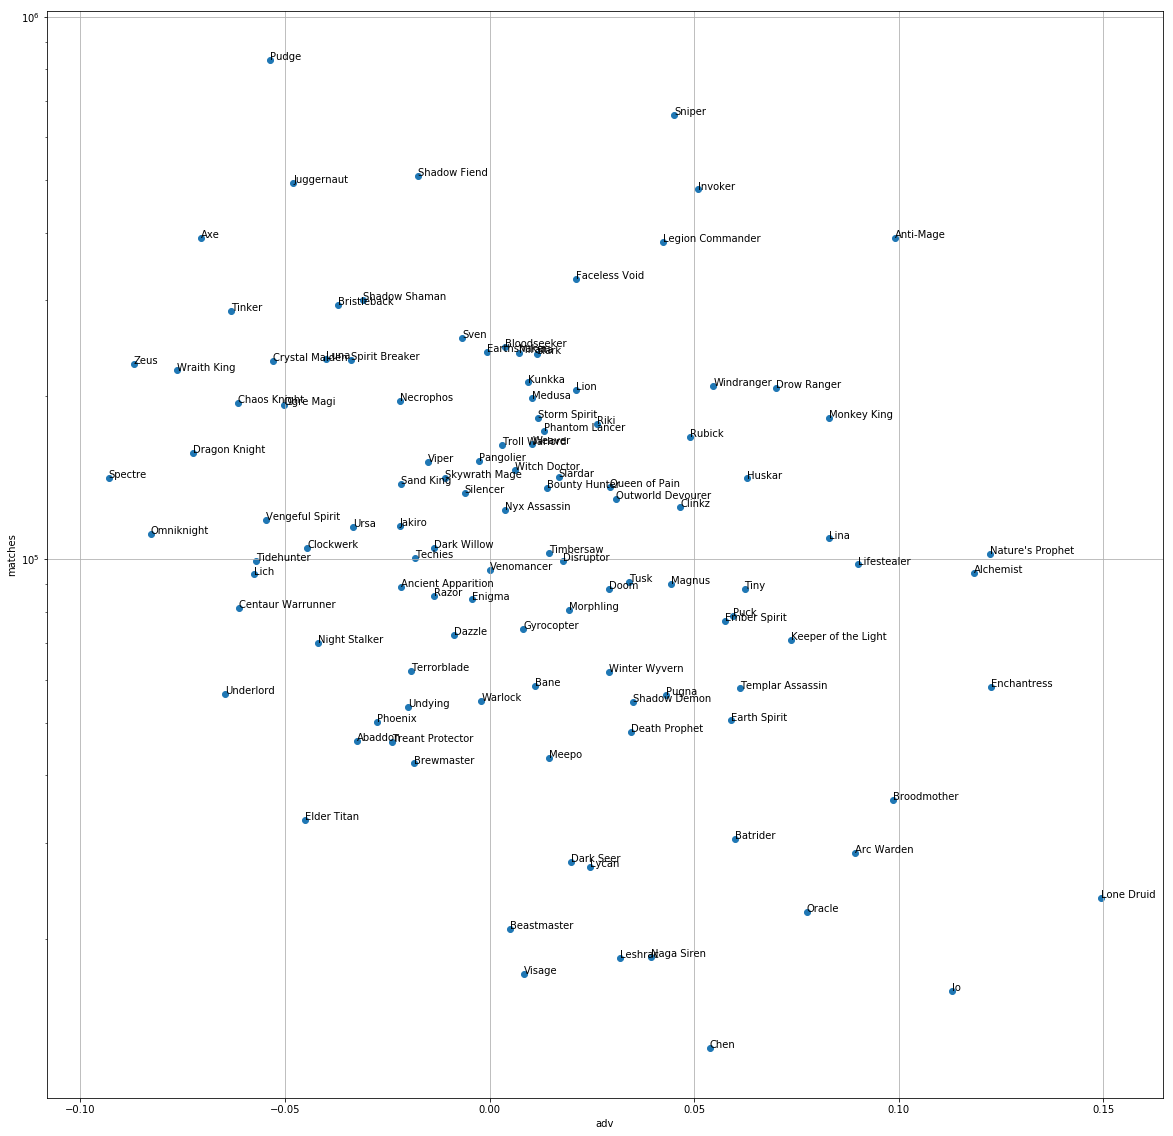

In [17]:

#res = []
#for i in range(len(heroes)):
#    res.append((name_for_offset(i), win_count[offset_to_id[i]], match_count[offset_to_id[i]], float(win_count[offset_to_id[i]]) /match_count[offset_to_id[i]]))

    
#i = list(filter(lambda x: x[1]['n']>20000 and x[1]['synergy'] > 0.01 , am.items()))
i = list(filter(lambda x: x[0][0] == 44, am.items()))
print(len(i))
#i = am.items()
z = list(map(lambda x: x[1]['advantage'], i))
y = list(map(lambda x: x[1]['n'], i))
n = list(map(lambda x: "{}".format( Hero.by_id(x[0][1])), i))

#for pair, v in i:
#    name = heroes[pair[1]]
#    v['advantage']
#    win_a = hero_wins[pair[0]] / max(hero_matches[pair[0]], 1)
#    win_b = hero_wins[pair[1]] / max(hero_matches[pair[1]], 1)
#    win_pair = opponents_wins[pair] / max(opponents_matches[pair], 1)
#    print(name, v['advantage'], win_a, win_b, win_pair)
    

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(z, y)
#ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('matches')
plt.xlabel('adv')
plt.grid()

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))

In [ ]:


res = []
#for i in range(len(heroes)):
#    res.append((name_for_offset(i), float(dire_wins[offset_to_id[i]]) / dire_matches[offset_to_id[i]],  float(radiant_wins[offset_to_id[i]]) / radiant_matches[offset_to_id[i]]))

for i in range(len(heroes)):
    res.append((name_for_offset(i), dire_wins[offset_to_id[i]], radiant_wins[offset_to_id[i]]))
    
y = list(map(lambda x: x[2], res))
z = list(map(lambda x: x[1], res))
n = list(map(lambda x: x[0], res))

fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(z, y)
#ax.set_xscale('log')
plt.ylabel('dire win prob')
plt.xlabel('radiant win prob')
plt.grid()

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i],y[i]))